In [151]:
import pandas as pd
import numpy as np
df = pd.read_csv("matches.csv")

# df.drop(['100_BOTTOM_rank', '100_BOTTOM_2_rank', '200_BOTTOM_rank', '200_BOTTOM_2_rank', '100_JUNGLE_rank', '200_JUNGLE_rank', '100_MIDDLE_rank', '200_MIDDLE_rank', '100_TOP_rank', '200_TOP_rank'],axis=1,inplace=True)
    
print(len(df))
df.head()

4848


,gameId,queueId,seasonId,gameVersion,gameDuration,100_JUNGLE_champ,100_JUNGLE_rank,100_TOP_champ,100_TOP_rank,100_MIDDLE_champ,...,200_JUNGLE_rank,200_TOP_champ,200_TOP_rank,200_MIDDLE_champ,200_MIDDLE_rank,200_BOTTOM_2_champ,200_BOTTOM_2_rank,200_BOTTOM_champ,200_BOTTOM_rank,win
0,516692892,440,9,7.22.208.1062,1731,9,1,164,1,99,...,1,31,1,157,1,43,1,236,1,1
1,512867763,420,9,7.21.206.6866,1402,54,1,6,3,38,...,1,122,3,55,5,21,2,412,3,0
2,511265795,440,9,7.21.206.6866,1576,81,1,150,4,99,...,5,39,4,3,2,51,4,16,1,0
3,511263892,440,9,7.21.206.6866,1508,5,1,150,2,61,...,4,57,3,131,3,51,4,89,2,0
4,510483208,440,9,7.20.204.9809,1807,516,1,157,1,36,...,3,80,1,38,4,498,2,12,2,0


The columns with data about champions are labeled as `<team>_<role>_<champ|rank>` 

In [152]:
import numpy as np
np.random.seed(29)
msk = np.random.rand(len(df)) < 0.8

train = df[msk].copy()
test = df[~msk].copy()

train.head()

,gameId,queueId,seasonId,gameVersion,gameDuration,100_JUNGLE_champ,100_JUNGLE_rank,100_TOP_champ,100_TOP_rank,100_MIDDLE_champ,...,200_JUNGLE_rank,200_TOP_champ,200_TOP_rank,200_MIDDLE_champ,200_MIDDLE_rank,200_BOTTOM_2_champ,200_BOTTOM_2_rank,200_BOTTOM_champ,200_BOTTOM_rank,win
1,512867763,420,9,7.21.206.6866,1402,54,1,6,3,38,...,1,122,3,55,5,21,2,412,3,0
2,511265795,440,9,7.21.206.6866,1576,81,1,150,4,99,...,5,39,4,3,2,51,4,16,1,0
3,511263892,440,9,7.21.206.6866,1508,5,1,150,2,61,...,4,57,3,131,3,51,4,89,2,0
4,510483208,440,9,7.20.204.9809,1807,516,1,157,1,36,...,3,80,1,38,4,498,2,12,2,0
5,510371693,440,9,7.20.204.9809,1636,59,2,36,1,101,...,4,31,4,34,3,113,1,18,1,1


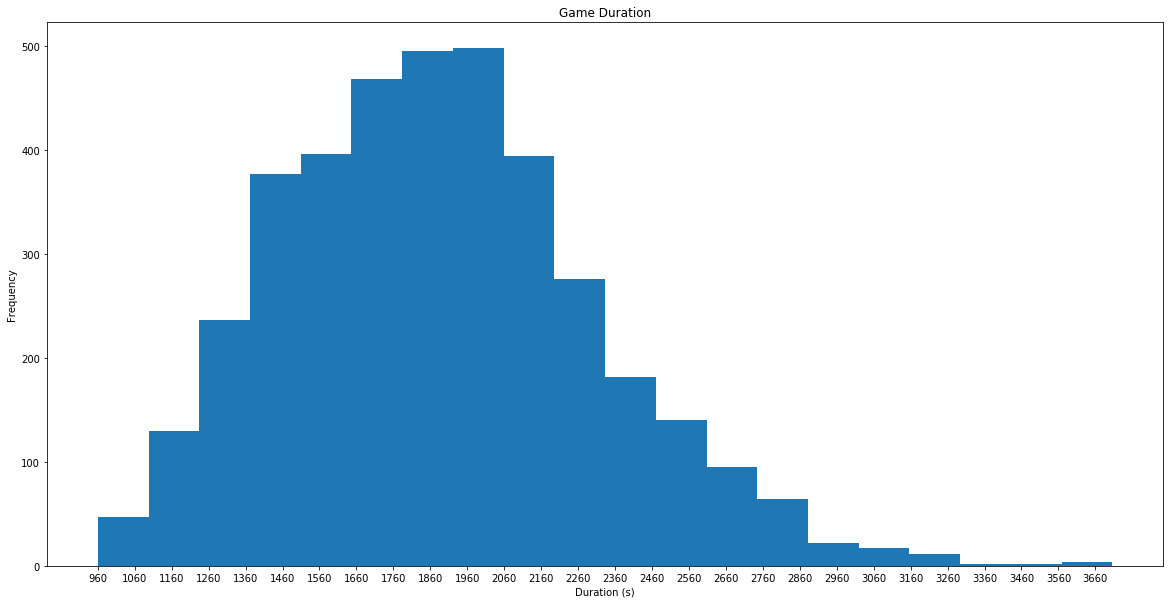

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.hist(train['gameDuration'], bins=20)
plt.title("Game Duration")
plt.xlabel("Duration (s)")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(train['gameDuration']), max(train['gameDuration']), 100))
plt.show()

In [154]:
print(len(train))
# removing games with rare duration
train = train[np.abs(train['gameDuration']-train['gameDuration'].mean())<=(3*train['gameDuration'].std())] 
len(train)

3856


3837

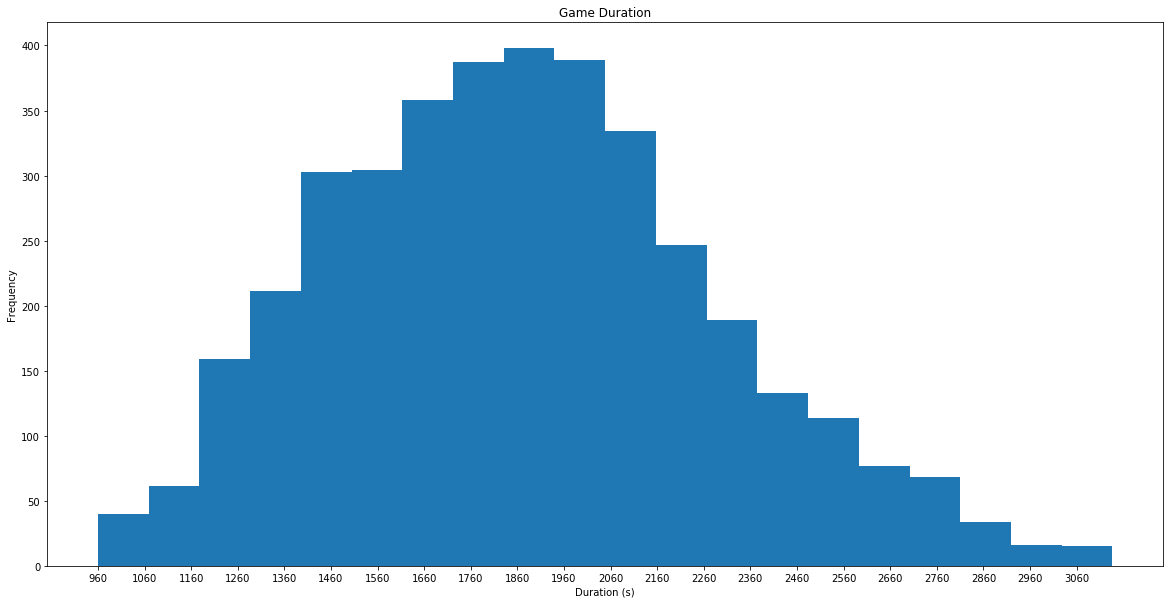

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.hist(train['gameDuration'], bins=20)
plt.title("Game Duration")
plt.xlabel("Duration (s)")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(train['gameDuration']), max(train['gameDuration']), 100))
plt.show()

In [156]:
# https://pastebin.com/raw/JPp5gBkT


# removing games with rare champs for the role

# temporaly disabled
if False:
    top_champs = pd.DataFrame({'champ':list(train['100_TOP_champ'])+list(train['200_TOP_champ'])})
    top_champs = top_champs['champ'].value_counts()

    jg_champs  = pd.DataFrame({'champ':list(train['100_JUNGLE_champ'])+list(train['200_JUNGLE_champ'])})
    jg_champs  = jg_champs['champ'].value_counts()

    mid_champs = pd.DataFrame({'champ':list(train['100_MIDDLE_champ'])+list(train['200_MIDDLE_champ'])})
    mid_champs = mid_champs['champ'].value_counts()

    bot_champs = pd.DataFrame({'champ':list(train['100_BOTTOM_champ'])+list(train['200_BOTTOM_champ'])+list(train['100_BOTTOM_2_champ'])+list(train['200_BOTTOM_2_champ'])})
    bot_champs = bot_champs['champ'].value_counts()

    limit = len(train)*0.005

    top_champs = set(top_champs[top_champs > limit].index)
    jg_champs  = set(jg_champs[jg_champs > limit].index)
    mid_champs = set(mid_champs[mid_champs > limit].index)
    bot_champs = set(bot_champs[bot_champs > limit].index)

    train = train[train['100_TOP_champ'].apply(lambda x: x      in top_champs)]
    train = train[train['200_TOP_champ'].apply(lambda x: x      in top_champs)]
    train = train[train['100_JUNGLE_champ'].apply(lambda x: x   in  jg_champs)]
    train = train[train['200_JUNGLE_champ'].apply(lambda x: x   in jg_champs )]
    train = train[train['100_MIDDLE_champ'].apply(lambda x: x   in mid_champs)]
    train = train[train['200_MIDDLE_champ'].apply(lambda x: x   in mid_champs)]
    train = train[train['100_BOTTOM_champ'].apply(lambda x: x   in bot_champs)]
    train = train[train['200_BOTTOM_champ'].apply(lambda x: x   in bot_champs)]
    train = train[train['100_BOTTOM_2_champ'].apply(lambda x: x in bot_champs)]
    train = train[train['200_BOTTOM_2_champ'].apply(lambda x: x in bot_champs)]

len(train)

3837

In [157]:
y_train = train['win']
X_train = train.copy()
X_train.drop(['gameVersion','win','queueId', 'seasonId', 'gameDuration', 'gameId'],axis=1,inplace=True)

y_test = test['win']
X_test = test.copy()
X_test.drop(['gameVersion','win','queueId', 'seasonId', 'gameDuration', 'gameId'],axis=1,inplace=True)

X_train.head()


,100_JUNGLE_champ,100_JUNGLE_rank,100_TOP_champ,100_TOP_rank,100_MIDDLE_champ,100_MIDDLE_rank,100_BOTTOM_2_champ,100_BOTTOM_2_rank,100_BOTTOM_champ,100_BOTTOM_rank,200_JUNGLE_champ,200_JUNGLE_rank,200_TOP_champ,200_TOP_rank,200_MIDDLE_champ,200_MIDDLE_rank,200_BOTTOM_2_champ,200_BOTTOM_2_rank,200_BOTTOM_champ,200_BOTTOM_rank
1,54,1,6,3,38,4,29,4,497,1,81,1,122,3,55,5,21,2,412,3
2,81,1,150,4,99,2,18,3,412,3,64,5,39,4,3,2,51,4,16,1
3,5,1,150,2,61,4,99,3,18,3,141,4,57,3,131,3,51,4,89,2
4,516,1,157,1,36,2,432,2,222,1,62,3,80,1,38,4,498,2,12,2
5,59,2,36,1,101,2,412,2,29,1,64,4,31,4,34,3,113,1,18,1


In [158]:
def train_model(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    print(name+" scores: \t train: %.3f \t test: %.3f"%(score_train,score_test))
    return (model, name, score_train, score_test)


import matplotlib.pyplot as plt
def plot_scores(title,models):
    N = len(models)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.45         # the width of the bars

    fig, ax = plt.subplots()

    test_scores = list(m[2] for m in models)
    train_scores = list(m[3] for m in models)

    rects1 = ax.bar(ind, test_scores, width, color='#00b1ff')
    rects1b = ax.bar(ind+width, train_scores, width, color='#0070ff')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels((m[1] for m in models),fontsize='xx-small')

    ax.legend((rects1[0], rects1b[0]), ('Train', 'Test'), loc='lower right')


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    '%.1f%%' % (100*height),
                    ha='center', va='bottom', fontsize='x-small')

    autolabel(rects1)
    autolabel(rects1b)
    fig.set_dpi(170)

    plt.show()

In [159]:
from sklearn.naive_bayes import BernoulliNB
bnb = train_model(BernoulliNB(),"Naive Bayes", X_train, y_train, X_test, y_test)

from sklearn.naive_bayes import MultinomialNB
mnb = train_model(MultinomialNB(),"Multi Naive Bayes", X_train, y_train, X_test, y_test)

from sklearn.tree import DecisionTreeClassifier
dt = train_model(DecisionTreeClassifier(),"DecisionTree", X_train, y_train, X_test, y_test)

from sklearn.linear_model import LogisticRegression
lr = train_model(LogisticRegression(),"LogisticRegression", X_train, y_train, X_test, y_test)

from sklearn.linear_model import SGDClassifier
gd = train_model(SGDClassifier(max_iter=5,tol=None),"SGD", X_train, y_train, X_test, y_test)

from sklearn.svm import SVC
svm = train_model(SVC(),"SVM", X_train, y_train, X_test, y_test)

Naive Bayes scores: 	 train: 0.510 	 test: 0.524
Multi Naive Bayes scores: 	 train: 0.523 	 test: 0.491
DecisionTree scores: 	 train: 1.000 	 test: 0.513
LogisticRegression scores: 	 train: 0.561 	 test: 0.528
SGD scores: 	 train: 0.492 	 test: 0.464
SVM scores: 	 train: 1.000 	 test: 0.524


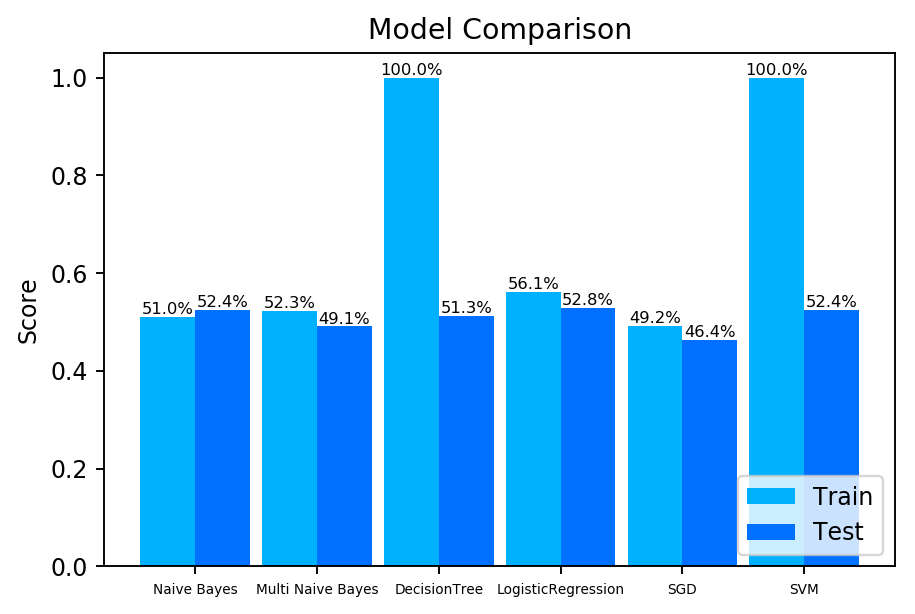

In [160]:
plot_scores("Model Comparison", [bnb,mnb,dt,lr,gd,svm])